## 01 - Limpieza de datos 

En esta primera fase, realizaremos una exploración inicial de los datos para entenderlos y realizaremos una limpieza completa del dataset

Empezamos cargando las librerías básicas necesarias y cargando los datos

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../data/dataset_estudiantes.csv")
df.sample(5)

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
211,10.787347,72.552771,100.000000,6.805627,23,Fácil,No,Tarde,Kinestésico,81.1,1
567,13.212716,54.268786,100.000000,4.007544,26,Medio,Sí,NaN,Lectura/Escritura,71.5,1
446,15.773073,66.679844,51.907706,6.590366,27,Medio,Sí,Tarde,Visual,67.9,1
442,12.126139,89.474066,98.892569,6.308178,29,Fácil,No,NaN,Kinestésico,89.3,1
440,1.000000,60.683516,60.238223,6.394967,21,Medio,No,Tarde,Kinestésico,65.3,1


Como primer paso, trataremos de entender los datos que tenemos y crear una tabla de metadatos

In [8]:
df.shape

(1000, 11)

In [7]:
df.columns

Index(['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia',
       'horas_sueno', 'edad', 'nivel_dificultad', 'tiene_tutor',
       'horario_estudio_preferido', 'estilo_aprendizaje', 'nota_final',
       'aprobado'],
      dtype='object')

Ya tenemos listos los datos, podemos ver que hay 1.000 filas (estudiantes) y 11 columnas (catacterísticas)

### **Descripción de las variables**



- **`horas_estudio_semanal`**: Número de horas que el estudiante dedica al estudio por semana.
- **`nota_anterior`**: Nota que obtuvo el alumno en la convocatoria anterior.
- **`tasa_asistencia`**: Porcentaje de clases a las que asistió el estudiante.
- **`horas_sueno`**: Número promedio de horas de sueño por noche.
- **`edad`**: Edad del estudiante (en años).
- **`nivel_dificultad`**: Dificultad que percibe el alumno respecto a sus estudios (Fácil, Medio, Difícil).
- **`tiene_tutor`**: Indica si el alumno cuenta con tutor académico (Sí / No).
- **`horario_estudio_preferido`**: Horario de estudio que el estudiante prefiere (Mañana, Tarde, Noche).
- **`estilo_aprendizaje`**: Estilo de aprendizaje principal del alumno (Visual, Auditivo, Lectura/Escritura, Kinestésico).
- **`nota_final`**: Nota final del curso. Variable objetivo para tareas de **regresión**.
- **`aprobado`**: Indica si el estudiante aprobó (1) o no (0). Variable objetivo para **clasificación**.

Vamos a ver ahora un  primer vistazo de sus distribuciones, rangos, outleirs y nulos 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   horas_estudio_semanal      1000 non-null   float64
 1   nota_anterior              1000 non-null   float64
 2   tasa_asistencia            1000 non-null   float64
 3   horas_sueno                850 non-null    float64
 4   edad                       1000 non-null   int64  
 5   nivel_dificultad           1000 non-null   object 
 6   tiene_tutor                1000 non-null   object 
 7   horario_estudio_preferido  900 non-null    object 
 8   estilo_aprendizaje         950 non-null    object 
 9   nota_final                 1000 non-null   float64
 10  aprobado                   1000 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 86.1+ KB


Podemos observar:
- Hay 3 columnas con nulos
- Tenemos 7 columnas numéricas y 4 categóricas

In [12]:
df.describe()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nota_final,aprobado
count,1000.000000,1000.000000,1000.000000,850.000000,1000.000000,1000.000000,1000.0000
mean,10.072366,69.885456,73.992079,7.007670,23.532000,71.441400,0.8980
std,4.852218,14.687697,18.195948,1.444790,3.476933,9.562078,0.3028
min,1.000000,30.000000,20.000000,4.000000,18.000000,30.000000,0.0000
25%,6.627548,59.882644,61.510192,5.995341,21.000000,64.775000,1.0000
50%,10.000000,70.000000,75.000000,7.020701,24.000000,71.400000,1.0000
75%,13.372452,80.117356,88.489808,8.018834,27.000000,77.900000,1.0000
max,25.000000,100.000000,100.000000,10.000000,29.000000,100.000000,1.0000


**Observaciones**
- A priori no se ven outliers ni valores imposibles.
- Las distribuciones están bastante equilibradas, excepto en las horas de estudio semanal, aunque es algo normal
- La mayoría de estudiantes asisten a clase y aprueban

In [22]:
cat_cols = df.select_dtypes(include = 'O')

for col in cat_cols:
    print(df[col].value_counts())
    print("------------------------")

nivel_dificultad
Medio      504
Fácil      313
Difícil    183
Name: count, dtype: int64
------------------------
tiene_tutor
No    597
Sí    403
Name: count, dtype: int64
------------------------
horario_estudio_preferido
Noche     344
Tarde     337
Mañana    219
Name: count, dtype: int64
------------------------
estilo_aprendizaje
Visual               363
Auditivo             254
Kinestésico          178
Lectura/Escritura    155
Name: count, dtype: int64
------------------------


**Observaciones**
- El nivel de dificultad es la valro menos balanceada, la mayoría tiene nivel medio
- La mayoría de estudianbtes tiene tutor
- El horario preferido es noche, aunque está algo más equiliobrado
- El estilo de aprendizaje más común es "Visual", seguido por "Auditivo", mientras que los estilos "Kinestésico" y "Lectura/Escritura" son menos frecuentes.

In [24]:
df.duplicated().sum()

np.int64(0)

No hay valores duplicados en este dataset

In [32]:
df.isnull().sum()

horas_estudio_semanal          0
nota_anterior                  0
tasa_asistencia                0
horas_sueno                  150
edad                           0
nivel_dificultad               0
tiene_tutor                    0
horario_estudio_preferido    100
estilo_aprendizaje            50
nota_final                     0
aprobado                       0
dtype: int64

In [36]:
nulos = df.isnull().sum() / df.shape[0] * 100
nulos[nulos > 0]

horas_sueno                  15.0
horario_estudio_preferido    10.0
estilo_aprendizaje            5.0
dtype: float64

- Horas_sueño y horario estudio tienen un número importante de nulos
- estilo aprendizaje tiene 50 nulos, un 5%, algo no tan importante pero importante a tener en cuenta

Con todo esto, ya podemos crear una tabla a modo de resumen sobre nuestros datos:

### **Tabla de Metadatos del Dataset de Estudiantes**

| Nombre de la variable         | Tipo de variable     | Descripción                                                  | Posibles valores                                     | Observaciones                                                  |
|------------------------------|----------------------|--------------------------------------------------------------|------------------------------------------------------|----------------------------------------------------------------|
| horas_estudio_semanal        | Numérica continua    | Número de horas de estudio a la semana.                      | 0 - 30                                 | Rango amplio   |
| nota_anterior                | Numérica continua    | Nota que obtuvo el alumno en la convocatoria anterior.        | 0 - 100                                               | Posible relación con la nota final.                         |
| tasa_asistencia              | Numérica continua    | Tasa de asistencia a clase en porcentaje.                    | 0 - 100                                        | Alta variabilidad, posible predictor fuerte.                  |
| horas_sueno                  | Numérica continua    | Promedio de horas que duerme el alumno al día.               | 0 - 12                                 | 15% de valores nulos, distribución relativamente simétrica.   |
| edad                         | Numérica discreta     | Edad del alumno.                                             | 18 - 30 (enseñanza básica)                                | Sin outliers, ligeramente sesgada hacia edades más jóvenes.   |
| nivel_dificultad             | Categórica ordinal   | Dificultad del alumno para el estudio.                       | 'Baja', 'Media', 'Alta'                               | Puede influir en la necesidad de apoyo académico.             |
| tiene_tutor                  | Categórica binaria   | Indica si el alumno tiene tutor o no.                        | 'Sí', 'No'                                           | 10% de nulos              |
| horario_estudio_preferido    | Categórica nominal   | Horario de estudio preferido por el alumno.                  | 'Mañana', 'Tarde', 'Noche'  | Puede relacionarse con hábitos y rendimiento.                 |
| estilo_aprendizaje           | Categórica nominal   | Forma de estudio que emplea el alumno.                       | 'Visual', 'Auditivo', 'Kinestésico', 'Lectura/Escritura'| 5% de nulos                     |
| nota_final (Objetivo - Reg)  | Numérica continua    | Nota final del alumno.                                       | 0 - 100                                               | Variable objetivo para modelos de regresión.                  |
| aprobado (Objetivo - Clas)   | Categórica binaria   | Indica si el alumno aprobó (nota_final ≥ 60).                | 0 = No, 1 = Sí                                        | Desbalance de clases: 90% de aprobados.                       |


Una vez ya tenemos un mayor entendimiento de nuestros datos, pasamos a la fase de limpieza

Comenzamos con el tratamiento de valores nulos, en la que deberemos tener en cuenta 3 variables:
- horas_sueno con 15% de nulos, un gran número
- horarios_estudio_preferido con 10% de nulos
- estilo_aprendizaje con 5% de nulos

Vamos primero con horas de sueño:

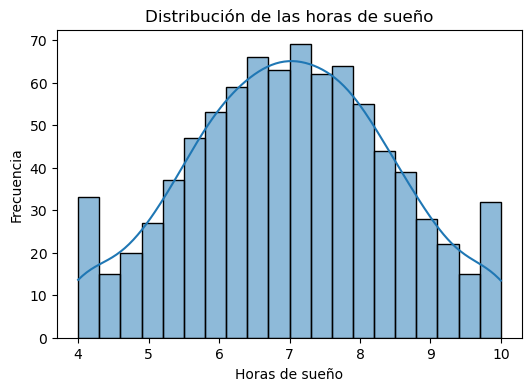

In [47]:
plt.figure(figsize = (6,4))
sns.histplot(df["horas_sueno"], kde = True, bins = 20)
plt.title("Distribución de las horas de sueño")
plt.xlabel("Horas de sueño")
plt.ylabel("Frecuencia")
plt.show()

Sigue una distribución normal con picos en mínimo y máximo

Veremos si tiene relación con horario_estudio_preferido para ver si sería útil utilizar knn:

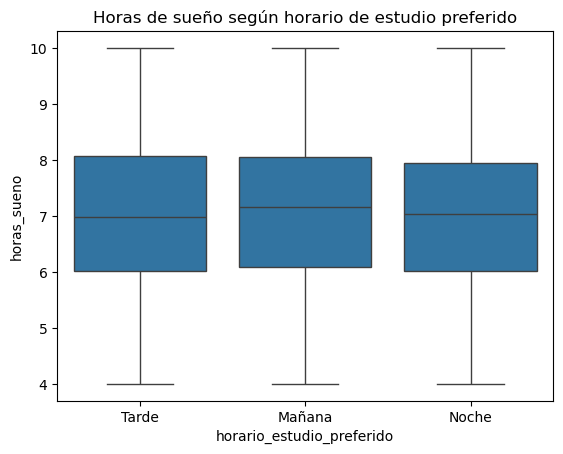

In [45]:
sns.boxplot(x='horario_estudio_preferido', y='horas_sueno', data=df)
plt.title('Horas de sueño según horario de estudio preferido')
plt.show()

No tiene relación, veremos ahora con otras variables numéicas:

In [49]:
df.corr(numeric_only=True)['horas_sueno'].sort_values(ascending=False)

horas_sueno              1.000000
tasa_asistencia          0.111229
edad                     0.100132
horas_estudio_semanal    0.078932
nota_final               0.074635
nota_anterior            0.070166
aprobado                 0.050793
Name: horas_sueno, dtype: float64

No hay relación, por lo que knn o inbterativeimputer no servirían mucho

In [51]:
df.horas_sueno.describe()

count    850.000000
mean       7.007670
std        1.444790
min        4.000000
25%        5.995341
50%        7.020701
75%        8.018834
max       10.000000
Name: horas_sueno, dtype: float64

Utilizaremos la media,q ue es igual que la mediana, ya que la mayoría de datos se concentran ahí, y sigue una distribución normal

In [73]:
hsmean= df.horas_sueno.mean()
df["horas_sueno"] = df["horas_sueno"].fillna(hsmean)

Vamos ahora con horario estudio preferido y estilo_aprendizaje

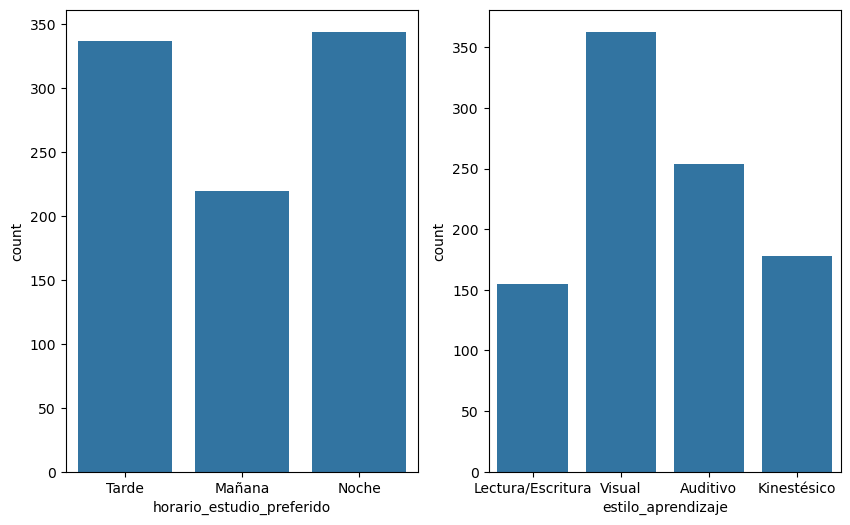

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
sns.countplot(x = df["horario_estudio_preferido"],  data=df, ax = ax[0])
sns.countplot(x = df["estilo_aprendizaje"], data=df, ax = ax[1])
plt.show()

- Horario_estudio_preferido está decentemente balanceado, aunque hay menos en mañana

- estilo_aprendizaje tiene la mayoría en visual, el resto está mejor balanceado

Para no crear sesgos, rellenaremos con desconocido:

In [70]:
df[["horario_estudio_preferido", "estilo_aprendizaje"]] = df[["horario_estudio_preferido", "estilo_aprendizaje"]].fillna("Desconocido")

In [74]:
df.isnull().sum()

horas_estudio_semanal        0
nota_anterior                0
tasa_asistencia              0
horas_sueno                  0
edad                         0
nivel_dificultad             0
tiene_tutor                  0
horario_estudio_preferido    0
estilo_aprendizaje           0
nota_final                   0
aprobado                     0
dtype: int64

Podemos observar que ya hemos tratado todos los nulos correctamente, pasamos al siguiente paso

Vamos a ver ahora si existen outliers:

In [81]:
num_cols = df.select_dtypes(include=["number"]).columns
num_cols

Index(['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia',
       'horas_sueno', 'edad', 'nota_final', 'aprobado'],
      dtype='object')

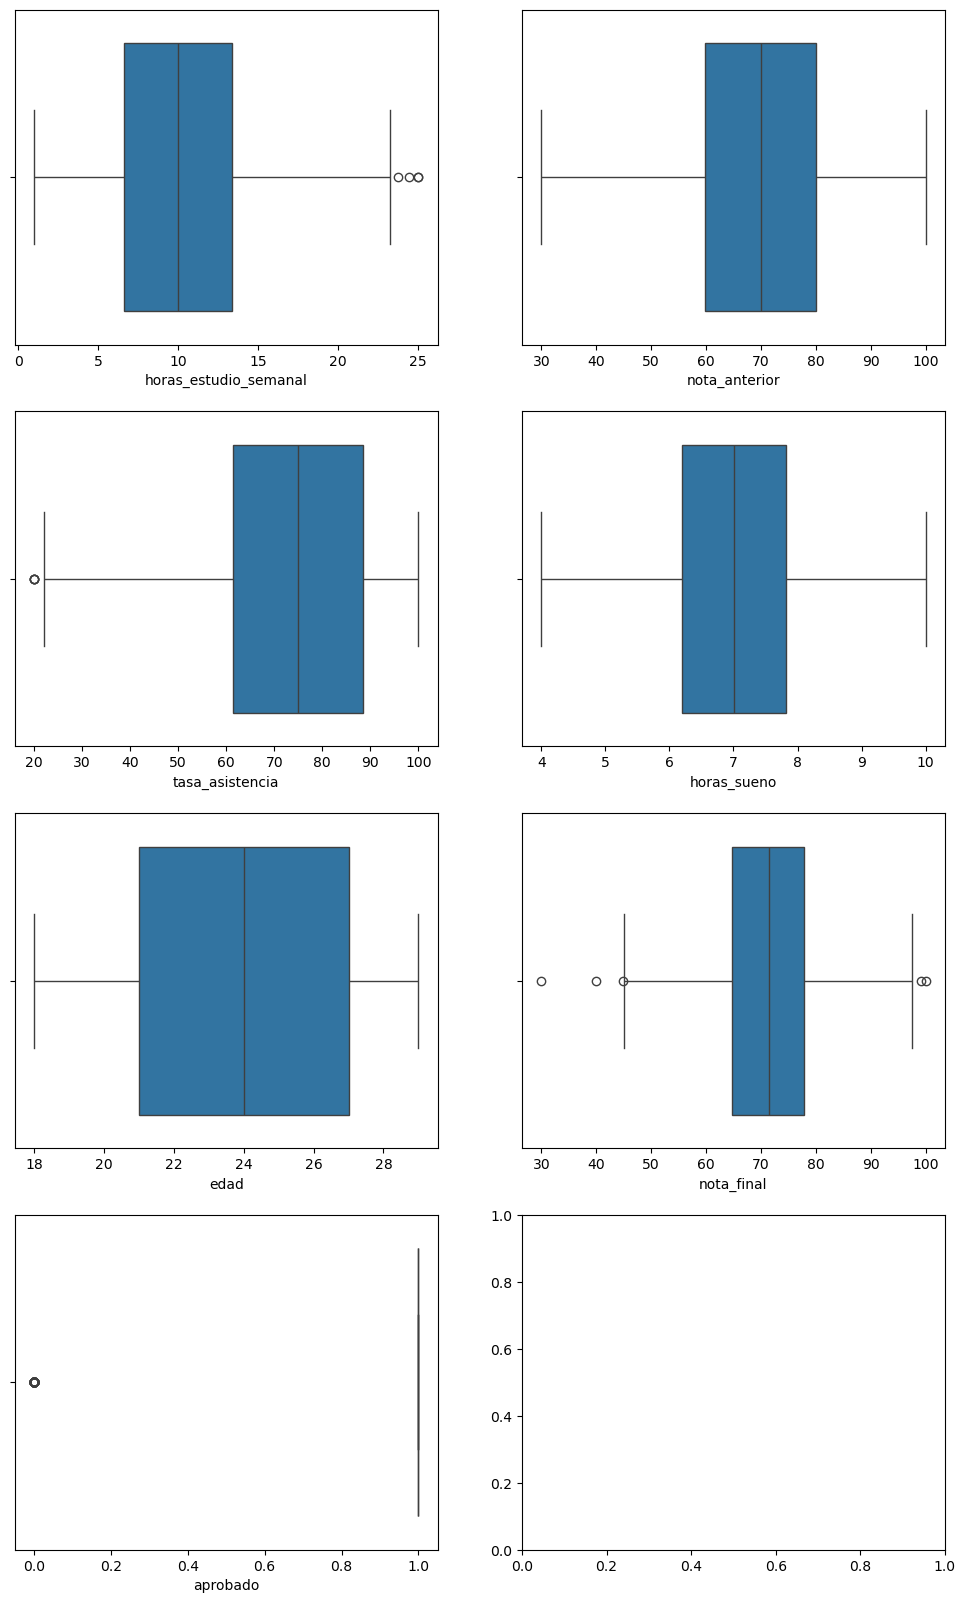

In [103]:
n_rows = np.ceil(len(num_cols) / 2).astype(int)

fig, ax = plt.subplots(n_rows, 2, figsize=(12, 5 * n_rows))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=ax[i])

plt.show()

Podemos ver que marca que algunas variables tienen outliers, a pesar de eso, los valores son totalmente normales y entendibles.

Además, no se alejan demasiado, por lo que no los trataremos

### Situación actual:
En este punto ya tenemos:
- Limpieza de nulos y duplicados
- Tratamiento de Outliers
- Detección de inconsistencias
- Tipos correctos

Con esto finaliza la fase de limpieza. Podemos pasar al Análisis Exploratorio de Datos (EDA). Guardaremos el DataFrame limpio para utilizarlo en el notebook 02.

In [108]:
df.to_csv("../data/clean_dataset_estudiantes.csv", index = False)